In [1]:
import pandas as pd

pd.set_option("max_colwidth", None)  # makes the tables render better

import intake

def get_from_cat(catalog, columns):
    """A helper function for inspecting an intake catalog.

    Call with the catalog to be inspected and a list of columns of interest."""
    import pandas as pd

    pd.set_option("max_colwidth", None)  # makes the tables render better

    if type(columns) == type(""):
        columns = [columns]
    return (
        catalog.df[columns]
        .drop_duplicates()
        .sort_values(columns)
        .reset_index(drop=True)
    )

In [2]:
from getpass import getuser # Libaray to copy things
from tempfile import NamedTemporaryFile, TemporaryDirectory 

import dask

from dask.distributed import Client
import multiprocessing

ncpu = multiprocessing.cpu_count()
threads = 8
nworker = ncpu // threads
print(
    f"Number of CPUs: {ncpu}, number of threads: {threads}, number of workers: {nworker}"
)
client = Client(
    processes=True, threads_per_worker=threads, n_workers=nworker, memory_limit="100GB"
)
client 

# calculation
import metpy.calc as mpcalc

# scipy
from scipy import stats
from scipy.ndimage import measurements
from scipy import ndimage
from scipy.optimize import curve_fit

# for plot
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# basic
from pathlib import Path # Object oriented libary to deal with paths
from dask.utils import format_bytes
from distributed import Client, progress, wait # Libaray to orchestrate distributed resources
import netCDF4 as nc
import numpy as np # Pythons standard array library
import xarray as xr # Libary to work with labeled n-dimensional data

# dask
import dask # Distributed data libary
import dask.distributed
import multiprocessing
from subprocess import run, PIPE
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
dask.config.config.get('distributed').get('dashboard').update({'link':'{JUPYTERHUB_SERVICE_PREFIX}/proxy/{port}/status'})

Number of CPUs: 256, number of threads: 8, number of workers: 32


2024-11-26 10:05:25,873 - distributed.diskutils - INFO - Found stale lock file and directory '/home/m/m300948/ICON_AMZDEF/Project1/dask-worker-space/worker-47knxwgd', purging
2024-11-26 10:05:25,882 - distributed.diskutils - INFO - Found stale lock file and directory '/home/m/m300948/ICON_AMZDEF/Project1/dask-worker-space/worker-99y1d5kl', purging
2024-11-26 10:05:25,890 - distributed.diskutils - INFO - Found stale lock file and directory '/home/m/m300948/ICON_AMZDEF/Project1/dask-worker-space/worker-byf95lv8', purging
2024-11-26 10:05:25,896 - distributed.diskutils - INFO - Found stale lock file and directory '/home/m/m300948/ICON_AMZDEF/Project1/dask-worker-space/worker-686vjvsl', purging
2024-11-26 10:05:25,904 - distributed.diskutils - INFO - Found stale lock file and directory '/home/m/m300948/ICON_AMZDEF/Project1/dask-worker-space/worker-2bp4015q', purging
2024-11-26 10:05:25,909 - distributed.diskutils - INFO - Found stale lock file and directory '/home/m/m300948/ICON_AMZDEF/Pro

In [3]:
import sys
sys.path.append('/home/m/m300948/ICON_AMZDEF')
import Tools

Number of CPUs: 256, number of threads: 8, number of workers: 32


# Catalog - 30years

_log catalog file: 30yrs_

In [4]:
catalog_file = "/home/m/m300466/ICON/DPP/ngc2scripts/postproc/ngc2013/ngc2013.json"
#catalog_file = "/work/k20200/k202134/Catalogs/ngc2012.json"
cat = intake.open_esm_datastore(catalog_file)
cat

,unique
variable_id,156
project,1
institution_id,1
source_id,1
experiment_id,1
simulation_id,1
realm,2
frequency,7
time_reduction,2
grid_label,1


In [5]:
cat.df.head(n=2)

,variable_id,project,institution_id,source_id,experiment_id,simulation_id,realm,frequency,time_reduction,grid_label,level_type,time_min,time_max,grid_id,format,uri
0,"(zghalf, zg, dzghalf)",nextGEMS,MPI-M,ICON-ESM,nextgems_cycle2,ngc2013,atm,fx,inst,gn,ml,2020-01-20T00:00:00.000,2020-01-20T00:00:00.000,5aff0578-9bd9-11e8-8e4a-af3d880818e6,netcdf,/work/bu1213/k203123/experiments/ngc2013/run_20200120T000000-20200131T235830/ngc2013_atm_vgrid_ml.nc
1,"(tas_gmean, rsdt_gmean, rsut_gmean, rlut_gmean, radtop_gmean, prec_gmean, evap_gmean, fwfoce_gmean)",nextGEMS,MPI-M,ICON-ESM,nextgems_cycle2,ngc2013,atm,12day,mean,gn,ml,2020-01-20T00:00:00.000,2020-01-20T00:00:00.000,not implemented,netcdf,/work/bu1213/k203123/experiments/ngc2013/run_20200120T000000-20200131T235830/ngc2013_atm_mon_20200120T000000Z.nc


In [6]:
get_from_cat(cat, ["project", "experiment_id", "source_id", "simulation_id"])

,project,experiment_id,source_id,simulation_id
0,nextGEMS,nextgems_cycle2,ICON-ESM,ngc2013


In [7]:
get_from_cat(cat.search(simulation_id="ngc2013"), ["realm", "frequency", "variable_id"])

,realm,frequency,variable_id
0,atm,12day,"(hydro_discharge_ocean_box, hydro_drainage_box, hydro_runoff_box, hydro_transpiration_box, sse_grnd_hflx_old_box, hydro_canopy_cond_limited_box, hydro_w_snow_box, hydro_snow_soil_dens_box)"
1,atm,12day,"(hydro_w_soil_sl_box, hydro_w_ice_sl_box, sse_t_soil_sl_box)"
2,atm,12day,"(psl, ps, sit, sic, tas, ts, uas, vas, cfh_lnd, sfcwind, clivi, cllvi, cptgzvi, hfls, hfss, prlr, pr, prw, qgvi, qrvi, qsvi, rlds, rlus, rlut, rsds, rsdt, rsus, rsut, tauu, tauv, rpds_dir, rpds_dif, rvds_dif, rnds_dif, evspsbl, clt, dew2)"
3,atm,12day,"(rldscs, rlutcs, rsdscs, rsuscs, rsutcs)"
4,atm,12day,"(tas_gmean, rsdt_gmean, rsut_gmean, rlut_gmean, radtop_gmean, prec_gmean, evap_gmean, fwfoce_gmean)"
5,atm,12day,"(ua, va, wa, ta, hus, rho, clw, cli, pfull)"
6,atm,1month,"(hydro_discharge_ocean_box, hydro_drainage_box, hydro_runoff_box, hydro_transpiration_box, sse_grnd_hflx_old_box, hydro_canopy_cond_limited_box, hydro_w_snow_box, hydro_snow_soil_dens_box)"
7,atm,1month,"(hydro_w_soil_sl_box, hydro_w_ice_sl_box, sse_t_soil_sl_box)"
8,atm,1month,"(psl, ps, sit, sic, tas, ts, uas, vas, cfh_lnd, sfcwind, clivi, cllvi, cptgzvi, hfls, hfss, prlr, pr, prw, qgvi, qrvi, qsvi, rlds, rlus, rlut, rsds, rsdt, rsus, rsut, tauu, tauv, rpds_dir, rpds_dif, rvds_dif, rnds_dif, evspsbl, clt, dew2)"
9,atm,1month,"(rldscs, rlutcs, rsdscs, rsuscs, rsutcs)"


In [10]:
cat = intake.open_esm_datastore(catalog_file)
hits = cat.search(simulation_id="ngc2013", variable_id="pr", frequency="3hour")
# The 1day files would have crashed the jupyter because the files are inconsistent across the run.
hits

,unique
variable_id,26
project,1
institution_id,1
source_id,1
experiment_id,1
simulation_id,1
realm,1
frequency,1
time_reduction,1
grid_label,1


In [8]:
cat = intake.open_esm_datastore(catalog_file)
hits_tas = cat.search(simulation_id="ngc2013", variable_id="tas", frequency="3hour")
# The 1day files would have crashed the jupyter because the files are inconsistent across the run.
hits_tas

,unique
variable_id,9
project,1
institution_id,1
source_id,1
experiment_id,1
simulation_id,1
realm,1
frequency,1
time_reduction,1
grid_label,1


_Data called from archive with Flo (test)_

In [11]:
## data called from archive - test with Flo
import outtake
catalog = "/work/k20200/k202134/Catalogs/ngc2013.json" # /home/k/k203123/NextGEMS_Cycle2.git/experiments/ngc2013/scripts/ngc2013.json
cat = intake.open_esm_datastore(catalog)
results = cat.search (simulation_id="ngc2013", variable_id="pr", frequency="3hour", time_min='.*')

AttributeError: Unknown open method 'open_esm_datastore'. Do you need to install a new driver from the plugin directory? https://intake.readthedocs.io/en/latest/plugin-directory.html
Registered opener methods: ['open_alias', 'open_catalog', 'open_csv', 'open_intake_remote', 'open_json', 'open_jsonl', 'open_ndzarr', 'open_numpy', 'open_textfiles', 'open_tiled', 'open_tiled_cat', 'open_yaml_file_cat', 'open_yaml_files_cat', 'open_zarr_cat']

In [28]:
results

,unique
variable_id,26
project,1
institution_id,1
source_id,1
experiment_id,1
simulation_id,1
realm,1
frequency,1
time_reduction,1
grid_label,1


In [29]:
!ls /scratch/k/k203123/INTAKE_CACHE/arch/bu1213/NGC2/ngc2013/outdata

 ngc2013_atm_2d_1mth_mean_20200120T000000Z.nc
 ngc2013_atm_2d_3h_mean_20200120T000000Z.nc
'~ngc2013_atm_2d_3h_mean_20200201T000000Z.nc6184224507521923405.slkretrieve'
 ngc2013_atm_ml_23h_inst_2_20200120T000000Z.nc
 ngc2013_lnd_2d_1mth_mean_20200120T000000Z.nc
 ngc2013_lnd_2d_1mth_mean_20200201T000000Z.nc
 ngc2013_lnd_tl_1mth_mean_20200120T000000Z.nc
 ngc2013_lnd_tl_23h_inst_20200120T000000Z.nc
 ngc2013_oce_2d_1h_inst_20200121T000000Z.nc
 ngc2013_oce_2d_1h_inst_20200122T000000Z.nc
 ngc2013_oce_2d_1h_inst_20200124T000000Z.nc
 ngc2013_oce_2d_1h_inst_20200125T000000Z.nc
 ngc2013_oce_2d_1h_inst_20200131T000000Z.nc
 ngc2013_oce_2d_1h_inst_20200201T000000Z.nc
 ngc2013_oce_2d_1h_mean_20200120T000000Z.nc
 ngc2013_oce_2d_1h_mean_20200123T000000Z.nc
 ngc2013_oce_2d_1h_mean_20200124T000000Z.nc
 ngc2013_oce_2d_1h_mean_20200127T000000Z.nc
 ngc2013_oce_2d_1h_mean_20200128T000000Z.nc


In [ ]:
##
outtake.get(results)

_Data load from archive with Flo (end)_

In [14]:
dataset_dict = hits.to_dataset_dict(cdf_kwargs={"chunks": {"time": 1}})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'project.institution_id.source_id.experiment_id.simulation_id.realm.frequency.time_reduction.grid_label.level_type'


In [9]:
dataset_tas_dict = hits_tas.to_dataset_dict(cdf_kwargs={"chunks": {"time": 1}})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'project.institution_id.source_id.experiment_id.simulation_id.realm.frequency.time_reduction.grid_label.level_type'


In [10]:
dataset_tas_dict

{'nextGEMS.MPI-M.ICON-ESM.nextgems_cycle2.ngc2013.atm.3hour.inst.gn.ml': <xarray.Dataset>
 Dimensions:  (time: 87761, height: 1, ncells: 5242880)
 Coordinates:
   * height   (height) float64 2.0
   * time     (time) datetime64[ns] 2020-01-20 2020-01-20T03:00:00 ... 2050-02-01
 Dimensions without coordinates: ncells
 Data variables:
     tas      (time, height, ncells) float32 dask.array<chunksize=(1, 1, 5242880), meta=np.ndarray>
 Attributes: (12/14)
     comment:                 Sapphire Dyamond (k203123) on l30641 (Linux 4.18...
     references:              see MPIM/DWD publications
     history:                 Wed Jun 29 12:21:44 2022: ncatted -a grid_file_u...
     number_of_grid_used:     33
     institution:             Max Planck Institute for Meteorology/Deutscher W...
     source:                  git@gitlab.dkrz.de:icon/icon-aes.git@0071358fec7...
     ...                      ...
     CDI:                     Climate Data Interface version 1.8.3rc (http://m...
     intake_

In [17]:
keys = list(dataset_dict.keys())
keys

['nextGEMS.MPI-M.ICON-ESM.nextgems_cycle2.ngc2013.atm.3hour.mean.gn.ml']

In [18]:
dataset = dataset_dict[keys[0]]
dataset

<xarray.Dataset>
Dimensions:  (time: 87761, ncells: 5242880)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20 2020-01-20T03:00:00 ... 2050-02-01
Dimensions without coordinates: ncells
Data variables:
    pr       (time, ncells) float32 dask.array<chunksize=(1, 5242880), meta=np.ndarray>
Attributes: (12/14)
    references:              see MPIM/DWD publications
    CDI:                     Climate Data Interface version 1.8.3rc (http://m...
    uuidOfHGrid:             5aff0578-9bd9-11e8-8e4a-af3d880818e6
    NCO:                     netCDF Operators version 5.0.6 (Homepage = http:...
    intake_esm_varname:      ['pr']
    title:                   ICON simulation
    ...                      ...
    institution:             Max Planck Institute for Meteorology/Deutscher W...
    comment:                 Sapphire Dyamond (k203123) on l30642 (Linux 4.18...
    source:                  git@gitlab.dkrz.de:icon/icon-aes.git@0071358fec7...
    grid_file_uri:           http://icon-downloads.mpimet.mpg.de/grids/public...
    number_of_grid_used:     33
    intake_esm_dataset_key:  nextGEMS.MPI-M.ICON-ESM.nextgems_cycle2.ngc2013....

In [10]:
keys_tas = list(dataset_tas_dict.keys())

In [11]:
dataset_tas = dataset_tas_dict[keys_tas[0]]

In [16]:
# save the dataset
dataset_tas.to_netcdf('/scratch/m/m300948/NGC2/dataset_tas.nc')

In [ ]:
# precipitation
def mon_mean(x):
    return x.groupby('time.month').mean('time')

# group by year, then apply the function:
dataset_mon = dataset.groupby('time.year').apply(mon_mean)

In [12]:
# tas
def mon_mean(x):
    return x.groupby('time.month').mean('time')

# group by year, then apply the function:
dataset_tas_mon = dataset_tas.groupby('time.year').apply(mon_mean)

In [13]:
# tas
def hour_mean(x):
    return x.groupby('time.hour').mean('time')

# group by year, then apply the function:
dataset_tas_hour = dataset_tas.groupby('time.year').apply(hour_mean)

In [14]:
tas_hour_30yrsavg = dataset_tas_hour.isel(height=0).mean('year')

_Masking coord: def_

In [29]:
# land mask
def mask_coord(dset):
        #filegr = '/pool/data/ICON/grids/public/mpim/0015-0016/land/r0005/bc_land_frac_2015.nc'
        filegr = '/pool/data/ICON/grids/public/mpim/0033/land/r0002/bc_land_frac_2015.nc'
        gridset = xr.open_dataset(filegr,chunks='auto').rename({'cell':'ncells'})
        land_sea_mask = gridset.notsea.persist()
        mask = land_sea_mask.values
        clat = gridset.clat.values*180/np.pi
        clon = gridset.clon.values*180/np.pi
        dset = dset.assign_coords(clon=("ncells",clon),clat=("ncells",clat))
        dset = dset.assign_coords(land_sea_mask=("ncells",mask))
        return dset

In [16]:
# amazon mask
def mask_coord(dset):
        #filegr = '/pool/data/ICON/grids/public/mpim/0015/land/r0002/bc_land_phys_1976.nc'
        #filegr = '/pool/data/ICON/grids/public/mpim/0033/land/r0002/bc_land_frac_1950.nc'
        filegr = '/work/mh0731/m300948/AMDEF/REGRID_BC/amz_100def/scena_100_implement/bc_land_phys_dian_final.nc' #0.25
        gridset = xr.open_dataset(filegr,chunks='auto').rename({'cell':'ncells'})
        land_sea_mask = gridset.forest_fract.persist()
        mask = land_sea_mask.values
        clat = gridset.clat.values*180/np.pi
        clon = gridset.clon.values*180/np.pi
        dset = dset.assign_coords(clon=("ncells",clon),clat=("ncells",clat))
        dset = dset.assign_coords(land_sea_mask=("ncells",mask))
        return dset

In [40]:
dataset_mon_mask = mask_coord(dataset_mon)

In [30]:
tas_hour_30yrs_mask = mask_coord(tas_hour_30yrsavg)

In [23]:
a = tas_hour_30yrs_mask.land_sea_mask == True
tas_hour_30yrs_mask_land = tas_hour_30yrs_mask.where(a)

In [26]:
tas_hour_30yrs_mask_land   

<xarray.Dataset>
Dimensions:        (hour: 8, ncells: 5242880)
Coordinates:
    height         float64 2.0
  * hour           (hour) int64 0 3 6 9 12 15 18 21
    clon           (ncells) float64 73.0 73.0 72.89 73.11 ... 76.31 76.39 76.5
    clat           (ncells) float64 52.61 52.69 52.57 ... -45.22 -45.09 -45.21
    land_sea_mask  (ncells) float64 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan
Dimensions without coordinates: ncells
Data variables:
    tas            (hour, ncells) float32 dask.array<chunksize=(1, 5242880), meta=np.ndarray>

In [33]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=225))
proj = ccrs.PlateCarree()
plot = plt.scatter(tas_hour_30yrs_mask_amz.clon[::int(1)],tas_hour_30yrs_mask_amz.clat[::int(1)],s=0.6,c=tas_hour_30yrs_mask_amz.tas[0,::int(1)],\
            cmap='viridis',vmin=290,vmax=310,transform=proj)

2024-11-26 10:17:27,227 - distributed.worker - ERROR - Worker stream died during communication: tcp://127.0.0.1:45031
Traceback (most recent call last):
  File "/home/m/m300948/.conda/envs/JUPYTER_MODULE/lib/python3.9/site-packages/distributed/comm/tcp.py", line 444, in connect
    stream = await self.client.connect(
  File "/home/m/m300948/.conda/envs/JUPYTER_MODULE/lib/python3.9/site-packages/tornado/tcpclient.py", line 275, in connect
    af, addr, stream = await connector.start(connect_timeout=timeout)
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/m/m300948/.conda/envs/JUPYTER_MODULE/lib/python3.9/asyncio/tasks.py", line 492, in wait_for
    fut.result()
asyncio.exceptions.CancelledError

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/m/m300948/.conda/envs/JUPYTER_MODULE/lib/python3.9/site-packages/distrib

_select temporal range_

In [31]:
def calculate_temporal(data,lat,lon,mask=None):
    if mask is not None:
        dsel = data.where(((data.clat>=lat[0]) & (data.clat<=lat[1])) & ((data.clon>=lon[0]) & (data.clon<=lon[1])) & (data.land_sea_mask==mask),drop=True)
    else:
        dsel = data.where(((data.clat>=lat[0]) & (data.clat<=lat[1])) & ((data.clon>=lon[0]) & (data.clon<=lon[1])),drop=True)
    return dsel

In [43]:
dataset_mon_amz = calculate_temporal(dataset_mon_mask,[-20,10],[-80,-35],mask=True)

In [32]:
tas_hour_30yrs_mask_amz = calculate_temporal(tas_hour_30yrs_mask,[-20,10],[-80,-35],mask=True)

In [20]:
tas_hour_30yrs_mask_amz

<xarray.Dataset>
Dimensions:        (hour: 8, ncells: 0)
Coordinates:
    height         float64 2.0
  * hour           (hour) int64 0 3 6 9 12 15 18 21
    clon           (ncells) float64 
    clat           (ncells) float64 
    land_sea_mask  (ncells) float64 
Dimensions without coordinates: ncells
Data variables:
    tas            (hour, ncells) float32 dask.array<chunksize=(1, 0), meta=np.ndarray>

In [24]:
# only for precipitation
dataset_mon_amz = dataset_mon_amz *3600*24

In [26]:
dataset_mon_amz.pr[:,:,:]

,Array,Chunk
Bytes,174.26 MiB,479.69 kiB
Shape,"(31, 12, 122801)","(1, 1, 122801)"
Count,471706 Tasks,372 Chunks
Type,float32,numpy.ndarray


In [45]:
dataset_mon_amz.tas[0,0,0,:]

<xarray.DataArray 'tas' (ncells: 122801)>
dask.array<getitem, shape=(122801,), dtype=float32, chunksize=(122801,), chunktype=numpy.ndarray>
Coordinates:
    month          int64 1
    height         float64 2.0
    year           int64 2020
    clon           (ncells) float64 -71.0 -71.07 -71.0 ... -72.3 -72.17 -72.23
    clat           (ncells) float64 9.922 9.958 9.836 ... -16.69 -16.69 -16.81
    land_sea_mask  (ncells) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
Dimensions without coordinates: ncells

_check the region by plotting_

In [26]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from matplotlib import pyplot as plt # Standard Plotting library
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from cartopy import crs as ccrs # Cartography library
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature

In [24]:
def plot_scatter(data,inter,year,month,lon,lat,ranges,cmaps,extends='both',title='',colorbar=False):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=225))
    proj = ccrs.PlateCarree()
    plot = plt.scatter(data.clon[::inter],data.clat[::inter],s=0.6,c=data.tas[year,month,::inter],\
               cmap=plt.cm.get_cmap(cmaps, ranges[2]),vmin=ranges[0],vmax=ranges[1],transform=proj)
    cb1 = plt.colorbar(plot,extend='max',orientation='horizontal',shrink=0.8,pad=0.09)
    cb1.ax.set_xlabel('Precipitation / mm day${-1}$)',fontsize=12)
    cb1.ax.tick_params(labelsize=12)
    #ax.set_title(title)   
    ax.coastlines(resolution='110m',linewidth=0.6)
    ax.set_extent([lon[0],lon[1],lat[0],lat[1]], crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(lat[0],lat[1]+0.1,10),crs=ccrs.PlateCarree())
    lat_formatter = LatitudeFormatter()
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.set_xticks(np.arange(lon[0], lon[1]+0.1,20),crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.tick_params(labelsize=12)
    ax.set_xlabel(None)
    ax.set_ylabel(None)

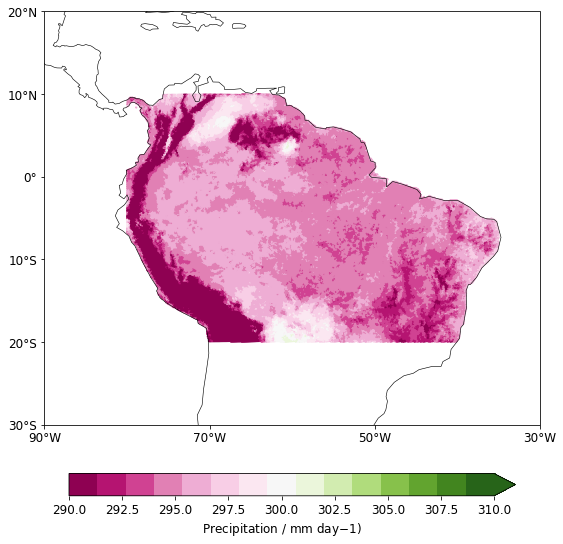

In [31]:
plot_scatter(dataset_mon_amz,int(1),0,0,[-90,-30],[-30,20],[290,310,15],'PiYG','max','Jan 2020',colorbar=True)

In [23]:
tas_hour_30yrs_mask

<xarray.Dataset>
Dimensions:        (hour: 8, ncells: 5242880)
Coordinates:
    height         float64 2.0
  * hour           (hour) int64 0 3 6 9 12 15 18 21
    clon           (ncells) float64 73.0 73.0 72.89 73.11 ... 76.31 76.39 76.5
    clat           (ncells) float64 52.61 52.69 52.57 ... -45.22 -45.09 -45.21
    land_sea_mask  (ncells) float64 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan
Dimensions without coordinates: ncells
Data variables:
    tas            (hour, ncells) float32 dask.array<chunksize=(1, 5242880), meta=np.ndarray>

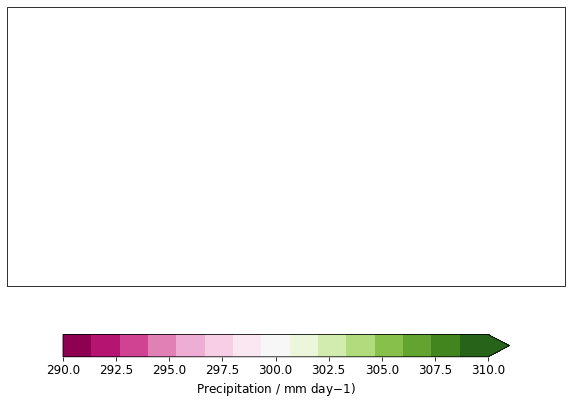

In [29]:
#plot_scatter(data,inter,year,month,lon,lat,ranges,cmaps,extends='both',title='',colorbar=False):
#plot_scatter(tas_hour_30yrs_mask.isel(hour=0),int(1),0,0,[-90,-30],[-30,20],[290,310,15],'PiYG','max','Jan 2020',colorbar=True)
data = tas_hour_30yrs_mask

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=225))
proj = ccrs.PlateCarree()
plot = plt.scatter(data.clon[::int(1)],data.clat[::int(1)],s=0.6,c=data.tas[0,::int(1)],\
            cmap=plt.cm.get_cmap('PiYG', 15),vmin=290,vmax=310,transform=proj)
cb1 = plt.colorbar(plot,extend='max',orientation='horizontal',shrink=0.8,pad=0.09)
cb1.ax.set_xlabel('Precipitation / mm day${-1}$)',fontsize=12)
cb1.ax.tick_params(labelsize=12)
#ax.set_title(title)   

In [ ]:
# amazon basin
#path_ori =Path('/work/mh0731/m300948/AMDEF/REGRID_BC/bc_land_soil_2015.nc')
#path_ori =Path('/work/mh0731/m300948/AMDEF/REGRID_BC/amz_ori/bc_land_frac_2015.nc') # for my simulation 
path_ori =Path('/work/mh0731/m300948/AMDEF/REGRID_BC/amz_ori/bc_land_phys_dian_1x1.nc') # for dian's simulation

#dset_ori = xr.open_dataset(path_ori)
dset_ori = xr.open_dataset(path_ori)

In [ ]:
import numpy as np
from scipy.interpolate import NearestNDInterpolator

lon = np.deg2rad(np.linspace(-180, 180, 600))
lat = np.deg2rad(np.linspace(-90, 90, 300))
lon2, lat2 = np.meshgrid(lon, lat)

points_icon = np.vstack((dset_ori.clon, dset_ori.clat)).T

nn_interpolation = NearestNDInterpolator(points_icon, dataset_mon_mask.pr.isel(year=1, month=1).values)
interpolated_nn = nn_interpolation((lon2, lat2))

In [ ]:
import matplotlib.pylab as plt

plt.figure(figsize=(15,15))
plt.imshow(np.flipud(interpolated_nn)*3600*24, vmin=0, vmax=10, cmap='viridis')

_Spatial mean of the variable_

In [10]:
def spatial_mean(files,fformat,var,time,lat,lon,time_step='1D',mask=None,better_time=True):
    ### mask = 0 to select ocean
    ### mask = 1 to select land
    variable=read_files(files,fformat,time,better_time).resample(time='1D').mean()
    ####area
    variable = mask_coord(variable)[['cell_area',var]]
    ####valid cells according to lon and lat
    valid = valid_cells(variable,lat,lon,mask)
    ###calculate
    cal_mean = calculate_spatial(variable.isel(ncells=valid),var)
    ###dask
    jobs = dask.persist(cal_mean)
    progress(jobs, notebook=False)
    var_final = dask.compute(cal_mean)
    return var_final[0].resample(time=time_step).mean('time')

In [29]:
pr_monavg_amz=dataset_mon_amz.mean("ncells", skipna=True)
a = pr_monavg_amz.pr

In [11]:
tas_monavg_amz=dataset_tas_hour_amz.sel(height=2).mean("ncells", skipna=True)
a = tas_monavg_amz.tas

NameError: name 'dataset_mon_amz' is not defined

In [48]:
a

<xarray.DataArray 'tas' (year: 31, month: 12)>
dask.array<mean_agg-aggregate, shape=(31, 12), dtype=float32, chunksize=(1, 1), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
    height   float64 2.0
  * year     (year) int64 2020 2021 2022 2023 2024 ... 2046 2047 2048 2049 2050

_save 30years of icon simulation as a csv file_

In [9]:
df=a.to_dataframe()
df=df.to_csv("ICON_30yrs_tas2.csv")

NameError: name 'a' is not defined

# Modified 30years

**standard deviation&mean**

In [58]:
import pandas as pd
#df_30 = pd.read_csv('ICON_30yrs_amzbasin_pr_final.csv',delimiter=";") # dimension change: year, month, pr... # original: delete delimiter 
df_30 = pd.read_excel('ICON_30yrs_amzbasin_pr_final.xlsx',engine='openpyxl') # dimension change: year, month, pr... # original: delete delimiter 
#df_30 = pd.read_excel('ICON_30yrs_amzbasin_pr_avg_1_2.xlsx',engine='openpyxl') # dimension change: year, month, pr... # original: delete delimiter 

In [59]:
df_30

,month,2020,2021,2022,2023,2024,2025,2026,2027,2028,...,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049
0,1,7.295034,9.500421,7.470751,7.662053,7.216185,9.502269,7.584026,9.510885,7.921628,...,7.470751,7.662053,11.788353,14.074437,7.584026,6.332371,4.743114,7.892296,7.353408,6.487248
1,2,8.021531,9.544718,8.206777,6.330792,8.058218,9.052851,8.060174,9.431026,7.368606,...,7.803012,7.712810,7.622608,7.532406,7.442204,9.431026,7.368606,7.696780,7.290271,5.506067
2,3,8.425933,8.382117,7.949227,7.171397,7.481278,8.006356,8.139246,8.762575,7.439357,...,7.083447,7.171397,7.481278,9.058945,9.437054,9.815164,7.439357,8.020350,6.459919,7.336804
3,4,7.925684,7.238712,7.173627,6.575538,6.605071,7.337679,7.169116,7.390137,6.943523,...,7.173627,7.575538,6.605071,7.337679,6.941999,6.829203,6.716406,7.151945,8.022578,7.384736
4,5,6.634086,7.305354,6.805614,6.706061,7.931979,6.877405,6.913345,6.432754,6.700194,...,6.805614,6.706061,7.931979,6.949285,6.985225,6.432754,6.700194,5.558010,6.432060,7.409006
5,6,5.438393,5.083713,6.256588,5.621481,5.477710,5.645930,5.403300,5.092497,6.047582,...,6.460579,6.729463,5.477710,5.645930,5.403300,5.092497,6.047582,5.587418,5.735256,6.157725
6,7,3.116287,2.949922,3.337890,3.555894,3.802722,4.390086,4.441210,4.019798,4.254040,...,4.113826,3.555894,3.802722,4.390086,4.441210,3.744352,3.717460,3.690567,4.066894,4.481507
7,8,3.154870,3.053197,2.722782,3.055060,3.593040,2.787576,3.425082,3.028582,3.314236,...,2.722782,3.055060,3.593040,2.787576,3.425082,3.028582,3.314236,2.335358,3.375799,3.141181
8,9,3.165568,3.315896,4.343988,3.636385,4.446707,3.983347,4.406753,4.038705,4.285084,...,4.875435,5.143918,5.412401,3.983347,4.121845,4.061011,4.000176,4.331636,3.569808,3.755937
9,10,5.509257,4.337185,5.742354,5.380336,6.017025,5.055644,5.766363,5.294201,5.258187,...,5.509342,5.481675,5.454007,5.426340,5.398673,5.294201,5.258187,5.050179,5.806393,6.121981


_precipitation_

In [3]:
df_30=df_30.drop([13,14,15,16,17,18,19,20])

KeyError: '[13, 14, 15, 16, 17, 18, 19, 20] not found in axis'

In [4]:
df_30.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'pr'}, inplace=True)
df_30 = df_30.dropna()
df_30_ready=df_30['pr'].str.split(';', expand=True)
df_30 = df_30.dropna()

In [21]:
df_30_ready=df_30_ready.iloc[:, :-1]
df_30_ready=df_30_ready.drop([0])

In [60]:
# drop off month
df_30_ready=df_30.drop('month', axis=1)
df_30_ready

,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,...,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049
0,7.295034,9.500421,7.470751,7.662053,7.216185,9.502269,7.584026,9.510885,7.921628,7.892296,...,7.470751,7.662053,11.788353,14.074437,7.584026,6.332371,4.743114,7.892296,7.353408,6.487248
1,8.021531,9.544718,8.206777,6.330792,8.058218,9.052851,8.060174,9.431026,7.368606,7.696780,...,7.803012,7.712810,7.622608,7.532406,7.442204,9.431026,7.368606,7.696780,7.290271,5.506067
2,8.425933,8.382117,7.949227,7.171397,7.481278,8.006356,8.139246,8.762575,7.439357,7.020350,...,7.083447,7.171397,7.481278,9.058945,9.437054,9.815164,7.439357,8.020350,6.459919,7.336804
3,7.925684,7.238712,7.173627,6.575538,6.605071,7.337679,7.169116,7.390137,6.943523,7.151945,...,7.173627,7.575538,6.605071,7.337679,6.941999,6.829203,6.716406,7.151945,8.022578,7.384736
4,6.634086,7.305354,6.805614,6.706061,7.931979,6.877405,6.913345,6.432754,6.700194,5.558010,...,6.805614,6.706061,7.931979,6.949285,6.985225,6.432754,6.700194,5.558010,6.432060,7.409006
5,5.438393,5.083713,6.256588,5.621481,5.477710,5.645930,5.403300,5.092497,6.047582,5.587418,...,6.460579,6.729463,5.477710,5.645930,5.403300,5.092497,6.047582,5.587418,5.735256,6.157725
6,3.116287,2.949922,3.337890,3.555894,3.802722,4.390086,4.441210,4.019798,4.254040,3.713565,...,4.113826,3.555894,3.802722,4.390086,4.441210,3.744352,3.717460,3.690567,4.066894,4.481507
7,3.154870,3.053197,2.722782,3.055060,3.593040,2.787576,3.425082,3.028582,3.314236,3.371732,...,2.722782,3.055060,3.593040,2.787576,3.425082,3.028582,3.314236,2.335358,3.375799,3.141181
8,3.165568,3.315896,4.343988,3.636385,4.446707,3.983347,4.406753,4.038705,4.285084,4.331636,...,4.875435,5.143918,5.412401,3.983347,4.121845,4.061011,4.000176,4.331636,3.569808,3.755937
9,5.509257,4.337185,5.742354,5.380336,6.017025,5.055644,5.766363,5.294201,5.258187,5.050179,...,5.509342,5.481675,5.454007,5.426340,5.398673,5.294201,5.258187,5.050179,5.806393,6.121981


In [40]:
df_30_ready.drop(columns=df_30_ready.columns[0], axis=1, inplace=True)

In [61]:
# change the type of values from object to float, csv is uploaded as object
df_30_ready.dtypes
df_30_int = df_30_ready.astype(float)

In [62]:
df_30_int['mean'] = df_30_int.iloc[:, 1:30].mean(axis=1,numeric_only=True)

In [63]:
df_30_int['std'] = df_30_int.iloc[:, 1:30].std(axis=1,numeric_only=True)

In [64]:
df_30_int

,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,...,2042,2043,2044,2045,2046,2047,2048,2049,mean,std
0,7.295034,9.500421,7.470751,7.662053,7.216185,9.502269,7.584026,9.510885,7.921628,7.892296,...,11.788353,14.074437,7.584026,6.332371,4.743114,7.892296,7.353408,6.487248,8.030979,1.802019
1,8.021531,9.544718,8.206777,6.330792,8.058218,9.052851,8.060174,9.431026,7.368606,7.696780,...,7.622608,7.532406,7.442204,9.431026,7.368606,7.696780,7.290271,5.506067,7.633812,1.089729
2,8.425933,8.382117,7.949227,7.171397,7.481278,8.006356,8.139246,8.762575,7.439357,7.020350,...,7.481278,9.058945,9.437054,9.815164,7.439357,8.020350,6.459919,7.336804,7.746599,0.885105
3,7.925684,7.238712,7.173627,6.575538,6.605071,7.337679,7.169116,7.390137,6.943523,7.151945,...,6.605071,7.337679,6.941999,6.829203,6.716406,7.151945,8.022578,7.384736,7.065732,0.508578
4,6.634086,7.305354,6.805614,6.706061,7.931979,6.877405,6.913345,6.432754,6.700194,5.558010,...,7.931979,6.949285,6.985225,6.432754,6.700194,5.558010,6.432060,7.409006,6.730583,0.684973
5,5.438393,5.083713,6.256588,5.621481,5.477710,5.645930,5.403300,5.092497,6.047582,5.587418,...,5.477710,5.645930,5.403300,5.092497,6.047582,5.587418,5.735256,6.157725,5.712349,0.420482
6,3.116287,2.949922,3.337890,3.555894,3.802722,4.390086,4.441210,4.019798,4.254040,3.713565,...,3.802722,4.390086,4.441210,3.744352,3.717460,3.690567,4.066894,4.481507,3.871972,0.389199
7,3.154870,3.053197,2.722782,3.055060,3.593040,2.787576,3.425082,3.028582,3.314236,3.371732,...,3.593040,2.787576,3.425082,3.028582,3.314236,2.335358,3.375799,3.141181,3.139918,0.305718
8,3.165568,3.315896,4.343988,3.636385,4.446707,3.983347,4.406753,4.038705,4.285084,4.331636,...,5.412401,3.983347,4.121845,4.061011,4.000176,4.331636,3.569808,3.755937,4.098186,0.541051
9,5.509257,4.337185,5.742354,5.380336,6.017025,5.055644,5.766363,5.294201,5.258187,5.050179,...,5.454007,5.426340,5.398673,5.294201,5.258187,5.050179,5.806393,6.121981,5.432981,0.476217


In [53]:
df_30_int.insert(0, "month", [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

_plotting timeseries of mean and std_

<AxesSubplot:xlabel='month'>

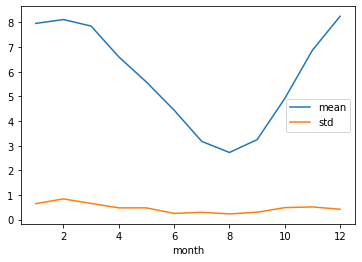

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
df_30_int.plot(x="month", y=["mean", "std"])

(0.0, 10.0)

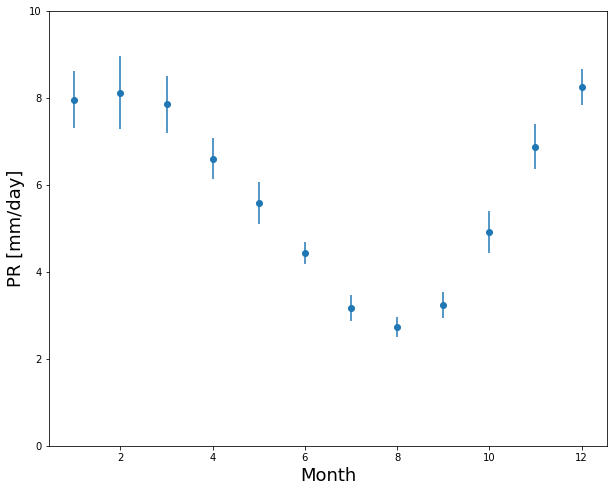

In [93]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111) 
# Set the axis lables
ax.set_xlabel('Month', fontsize = 18)
ax.set_ylabel('PR [mm/day]', fontsize = 18)

ax.errorbar(df_30_int["month"], df_30_int["mean"], df_30_int["std"], linestyle='None', marker='o')
#df_30_int.plot(x="month", y=["mean"])
#b.plot.line(label='CTL',c='black',linewidth=3)
#c.plot.line(label='DEF100',ls='--',c='black',linewidth=3)
ax.set_ylim(0,10)

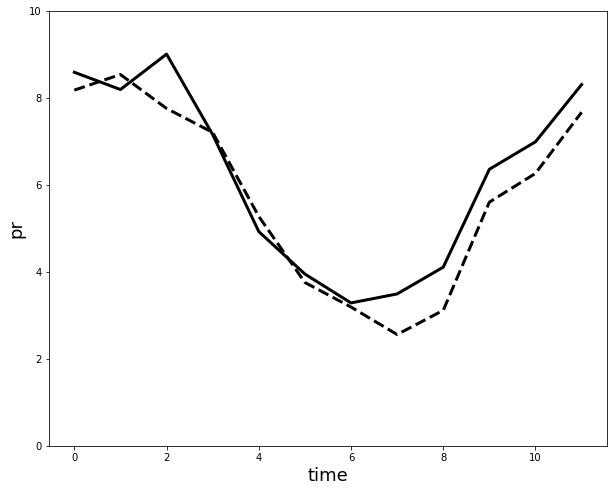

In [95]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111) 
# Set the axis lables
ax.set_xlabel('Month', fontsize = 18)
ax.set_ylabel('PR [mm/day]', fontsize = 18)

#ax.errorbar(df_30_int["month"], df_30_int["mean"], df_30_int["std"], linestyle='None', marker='o')
#df_30_int.plot(x="month", y=["mean"])
b.plot.line(label='CTL',c='black',linewidth=3)
c.plot.line(label='DEF100',ls='--',c='black',linewidth=3)
ax.set_ylim(0,10)
fig.savefig('./pr_exp.png', transparent=True)

_temperature_

In [8]:
df_30.rename(columns={'month;2020;2021;2022;2023;2024;2025;2026;2027;2028;2029;2030;2031;2032;2033;2034;2035;2036;2037;2038;2039;2040;2041;2042;2043;2044;2045;2046;2047;2048;2049;':'tas'}, inplace=True)

In [9]:
df_30_ready=df_30['tas'].str.split(';', expand=True)

In [10]:
df_30_ready=df_30_ready.iloc[:, :-1]

In [11]:
df_30_ready.dtypes
df_30_int = df_30_ready.astype(float)

In [12]:
df_30_int=df_30_int.div(100000)

In [13]:
df_30_int.drop(columns=df_30_int.columns[0], axis=1, inplace=True)

In [14]:
df_30_int['mean'] = df_30_int.iloc[:, 1:30].mean(axis=1,numeric_only=True)
df_30_int['std'] = df_30_int.iloc[:, 1:30].std(axis=1,numeric_only=True)

In [15]:
df_30_int

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,mean,std
0,293.80298,296.86670,297.41300,297.19925,297.93170,297.70250,298.43106,297.38480,297.54355,297.27744,...,296.89697,297.48030,297.86450,297.77050,297.52628,298.21167,297.57430,297.09940,297.493758,0.432585
1,297.10355,296.95386,297.71066,297.57672,298.24384,297.87204,298.61780,297.20700,297.75070,297.45197,...,297.32590,297.69528,297.83330,298.26770,298.06213,298.78690,297.63670,297.92136,297.805485,0.491227
2,297.48306,296.78687,297.82940,297.93707,298.16534,297.89557,298.58734,297.35925,297.97464,297.41632,...,297.69278,297.51980,297.90005,298.06740,298.05984,299.09418,297.94180,297.72937,297.892217,0.505041
3,296.96716,296.59778,297.56635,297.32580,297.74020,297.85455,298.21564,297.09960,298.06677,297.41254,...,297.00574,297.19522,297.66312,297.88342,297.74216,298.11893,297.36484,297.01456,297.514205,0.405409
4,297.33908,296.71915,297.00174,296.96344,297.15700,297.85922,297.52426,297.21207,297.30902,295.97873,...,296.22778,296.83823,296.51210,297.30383,297.27472,297.38170,296.93387,296.43560,296.997482,0.496662
5,296.67438,296.86026,296.38507,296.71698,296.62228,297.45822,295.85675,296.54822,296.57712,296.03590,...,295.81650,296.24450,296.44962,296.57200,296.99777,296.89017,296.39062,295.80606,296.476200,0.478507
6,296.72867,297.12534,296.78973,297.12943,297.34003,297.25235,296.93356,297.17902,296.75922,296.51657,...,296.55994,296.48947,296.94754,297.19443,297.79984,297.35144,296.57544,295.67957,296.910552,0.494032
7,298.56740,298.88050,298.89313,299.06120,298.44156,299.50050,298.99786,299.05400,298.71338,298.16200,...,298.24850,298.06980,298.92932,298.66135,298.29126,298.96915,298.18637,297.80582,298.589612,0.425568
8,300.62793,300.59357,300.09833,299.85287,300.17834,300.64920,299.94662,299.53460,299.58545,299.56950,...,300.18106,299.68570,300.14606,300.23257,299.70477,300.38782,299.90823,299.48242,299.982261,0.386815
9,300.18506,301.01968,299.54172,300.30490,299.91107,301.30762,299.62357,299.95734,300.10710,300.16720,...,300.32666,299.82446,299.30792,300.00006,299.71310,300.23727,300.10190,299.15863,299.913443,0.500764


In [16]:
df_30_int.insert(0, "month", [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

(293.0, 303.0)

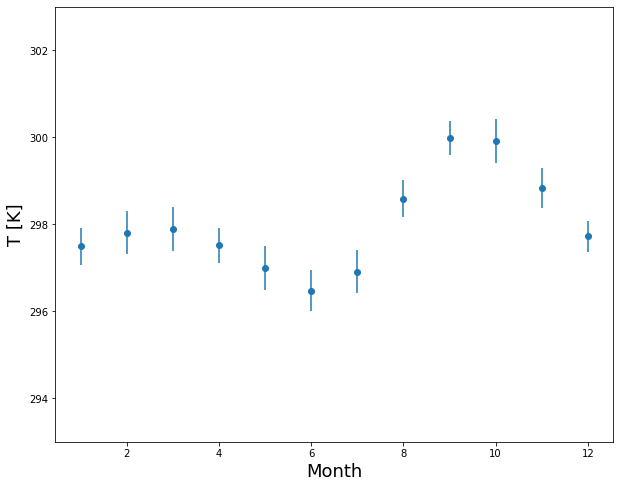

In [21]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111) 
# Set the axis lables
ax.set_xlabel('Month', fontsize = 18)
ax.set_ylabel('T [K]', fontsize = 18)

ax.errorbar(df_30_int["month"], df_30_int["mean"], df_30_int["std"], linestyle='None', marker='o')
#df_30_int.plot(x="month", y=["mean"])
#b.plot.line(label='CTL',c='black',linewidth=3)
#c.plot.line(label='DEF100',ls='--',c='black',linewidth=3)
ax.set_ylim(293,303)

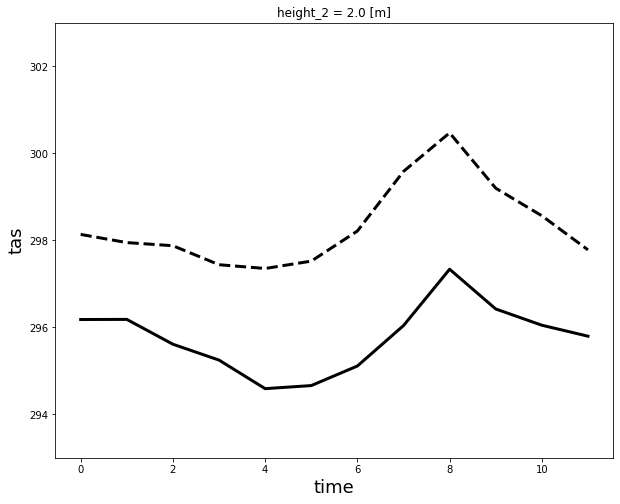

In [39]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111) 
# Set the axis lables
ax.set_xlabel('Month', fontsize = 18)
ax.set_ylabel('PR [mm/day]', fontsize = 18)

#ax.errorbar(df_30_int["month"], df_30_int["mean"], df_30_int["std"], linestyle='None', marker='o')
#df_30_int.plot(x="month", y=["mean"])
b.sel(height_2='2.0').plot.line(label='CTL',c='black',linewidth=3)
c.sel(height_2='2.0').plot.line(label='DEF100',ls='--',c='black',linewidth=3)
ax.set_ylim(293,303)
fig.savefig('./tas_exp.png', transparent=True)

**Timing of maximum/minimum value**

In [ ]:
import datetime
fig, myax = plt.subplots(figsize=(20,8))

for i in range(20):
    a.isel(year=i,height=0).plot.line()
    #plt.plot(np.arange(1,13), a.isel(year=i))  
#b.plot.line(label='CTL',c='black',linewidth=3)
#c.plot.line(label='DEF100',ls='--',c='black',linewidth=3)

myax.set_ylim(292,308)
#myax.set_ylabel('Precipitation [mm/day]',fontsize=30)
myax.set_ylabel('Temperature [K]',fontsize=30)

myax.set_xticks(fontsize=25,rotation=45)
myax.set_yticks(fontsize=30)

myax.set_xlabel('Month')
myax.set_xticks(range(1, 13))
myax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])

myax.set_legend(fontsize=25, frameon=False)

In [86]:
a_idxmin = a.idxmin(dim="month") # pr
a_idxmax = a.idxmax(dim="month") # temp

In [87]:
a_idxmin

<xarray.DataArray 'month' (year: 31)>
dask.array<where, shape=(31,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 2020 2021 2022 2023 2024 ... 2046 2047 2048 2049 2050

# load SIMULATION PR

In [3]:
# def 100
path_def100 =Path('/scratch/m/m300948/def_100/pr')
glob_pattern = 'def_monthly_pr_202'
file_def100 = sorted([str(f) for f in path_def100.glob(f'{glob_pattern}*.nc')])[:]
var = 'pr'
dset_def100 = xr.open_mfdataset(file_def100,parallel=True)[var].chunk({'time':24})

In [4]:
# ctl
path_ctl =Path('/scratch/m/m300948/test_04/pr')
glob_pattern = 'ctl_monthly_pr_202'
file_ctl = sorted([str(f) for f in path_ctl.glob(f'{glob_pattern}*.nc')])[:]
var = 'pr'
dset_ctl = xr.open_mfdataset(file_ctl,parallel=True)[var].chunk({'time':24})

In [5]:
dset_ctl_mon = dset_ctl.resample(time='1M').mean("time")
dset_def100_mon = dset_def100.resample(time='1M').mean("time")

In [6]:
monthly_mean_ctl=dset_ctl_mon.groupby('time.month').mean('time')
monthly_mean_def100=dset_def100_mon.groupby('time.month').mean('time')

In [19]:
# select certain months
dset_ctl_mon = dset_ctl_mon.sel(time=slice("2022-01-31","2022-12-31"))
dset_def100_mon = dset_def100_mon.sel(time=slice("2022-01-31","2022-12-31"))

In [8]:
import Tools
dset_mon_mask_ctl = Tools.masking("crop_whole",monthly_mean_ctl)
dset_mon_mask_def100 = Tools.masking("crop_whole",monthly_mean_def100)

In [9]:
dset_mask_ctl = Tools.masking("crop_whole", dset_ctl_mon)
dset_mask_def100 = Tools.masking("crop_whole", dset_def100_mon)

In [49]:
# seasons
# wet
wet_pr_ctl = monthly_mean_ctl.where(monthly_mean_ctl.month.isin([1,2,12]), drop=True)
wet_pr_def100 = monthly_mean_def100.where(monthly_mean_def100.month.isin([1,2,12]), drop=True)

# dry
dry_pr_ctl = monthly_mean_ctl.where(monthly_mean_ctl.month.isin([7,8,9]), drop=True)
dry_pr_def100 = monthly_mean_def100.where(monthly_mean_def100.month.isin([7,8,9]), drop=True)

wet_pr_ctl_mean = wet_pr_ctl.mean("month")
wet_pr_def100_mean = wet_pr_def100.mean("month")

dry_pr_ctl_mean = dry_pr_ctl.mean("month")
dry_pr_def100_mean = dry_pr_def100.mean("month")

In [12]:
# average for the whole year
pr_mean_ctl = dset_mon_mask_ctl.mean('month')
pr_mean_def = dset_mon_mask_def100.mean('month')

In [48]:
monthly_mean_ctl

<xarray.DataArray 'pr' (month: 12, lat: 800, lon: 800)>
dask.array<stack, shape=(12, 800, 800), dtype=float32, chunksize=(1, 800, 800), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -99.95 -99.85 -99.75 -99.65 ... -20.25 -20.15 -20.05
  * lat      (lat) float64 -59.95 -59.85 -59.75 -59.65 ... 19.75 19.85 19.95
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [14]:
# Averaged Monthly precipitation & land only
ctl_pr_avg = pr_mean_ctl.sel(lon=slice(-80,-35), lat=slice(-20,10)).mean(("lon", "lat"),skipna=True)
def100_pr_avg = pr_mean_def.sel(lon=slice(-80,-35), lat=slice(-20,10)).mean(("lon", "lat"),skipna=True)

In [20]:
a=ctl_pr_avg.values
b=def100_pr_avg.values

In [21]:
print(a*3600*24)
print(b*3600*24)

6.092380452901125
5.817070766352117


In [52]:
# Averaged Monthly precipitation & land only
wet_ctl_pr_avg = wet_pr_ctl_mean.sel(lon=slice(-80,-35), lat=slice(-20,10)).mean(("lon", "lat"),skipna=True)
wet_def100_pr_avg = wet_pr_def100_mean.sel(lon=slice(-80,-35), lat=slice(-20,10)).mean(("lon", "lat"),skipna=True)

dry_ctl_pr_avg = dry_pr_ctl_mean.sel(lon=slice(-80,-35), lat=slice(-20,10)).mean(("lon", "lat"),skipna=True)
dry_def100_pr_avg = dry_pr_def100_mean.sel(lon=slice(-80,-35), lat=slice(-20,10)).mean(("lon", "lat"),skipna=True)

In [46]:
c*3600*24

7.804802642203867

In [47]:
d*3600*24

7.545825722627342

In [53]:
c=wet_ctl_pr_avg.values
d=wet_def100_pr_avg.values
e=dry_ctl_pr_avg.values
f=dry_def100_pr_avg.values

In [54]:
print(e*3600*24)
print(f*3600*24)

3.9404382929205894
3.4541372442618012


_2D: spatial plot_

In [23]:
dset_mask_ctl

<xarray.DataArray 'pr' (month: 12, lat: 800, lon: 800)>
dask.array<where, shape=(12, 800, 800), dtype=float32, chunksize=(1, 800, 800), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -99.95 -99.85 -99.75 -99.65 ... -20.25 -20.15 -20.05
  * lat      (lat) float64 -59.95 -59.85 -59.75 -59.65 ... 19.75 19.85 19.95
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
    time     object 0001-01-31 00:00:00

In [65]:
viridis_new = Tools.colormap_create('viridis_r',21,0,1)
BrBG_new = Tools.colormap_create('BrBG',21,9,12)

In [66]:
def plot_data(title, data, colormap, extend, varmin, varmax, space, 
                    lat_min, lat_max, int_lat, lon_min, lon_max, int_lon):
    dset_bd = xr.open_dataset('/work/mh0731/m300948/AMDEF/REGRID_BC/masking_files/AMAZON_Biome.nc')
    AMZ_BD = dset_bd.AMAZON_BIOMES
    
    proj = ccrs.PlateCarree(central_longitude=180) # Create Mollweide projections
    fig  = plt.figure(figsize=(8, 10))
    ax = fig.add_subplot(111, projection=proj)
    
    minlon = lon_min + 5 + 180 #on
    maxlon = lon_max - 5 + 180 #on
    
    ax.set_extent([minlon,maxlon,lat_min+5,lat_max-5],proj) #on
    ax.coastlines(resolution='50m', linewidth=1.5, color='black')
    ax.gridlines(draw_labels=True, linewidth=1, color='gray',
                        xlocs=range(-180,180,30), ylocs=range(-90,90,30), crs=ccrs.PlateCarree())
    plot = data.plot(
                      ax=ax,
                      transform=ccrs.PlateCarree(),
                      cmap=colormap,
                      vmin=varmin,
                      vmax=varmax,
                     # cbar_kwargs={'label': 'Surface Temperature [K]',
                     #              'extend': 'both',
                     #              'shrink': .5,
                     #              'orientation': 'horizontal'},
                      add_colorbar=False
                     )
   
    kw = {'levels':[-1], 'colors':['red'], 'linestyles':['solid']}
    plot_bd = AMZ_BD.plot.contour( 
                      ax=ax,
                      transform=ccrs.PlateCarree(),
                      **kw
                     )
    
    bounds = np.linspace(varmin,varmax, space)
    cb = plt.colorbar(plot, orientation="horizontal", fraction=0.05, pad=0.10, extend=extend,ticks=bounds, boundaries=bounds)
    cb.ax.tick_params(labelsize=20)
    cb.ax.set_xticklabels(bounds,rotation=270)
    ax.set_title(title, y=1.1, fontsize=25)

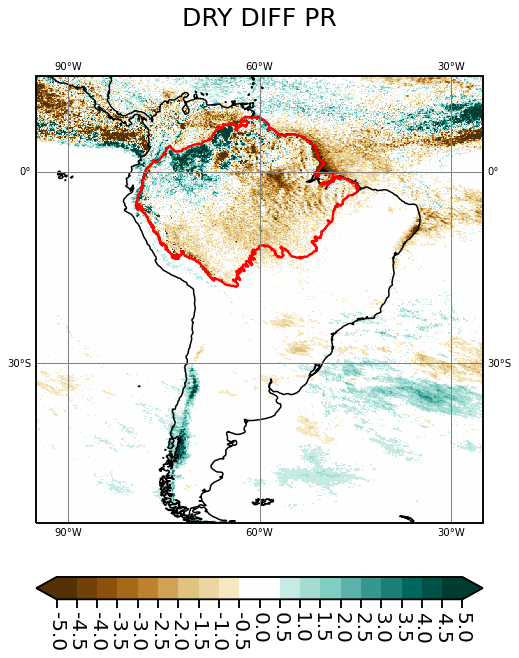

In [67]:
plot_data('DRY DIFF PR', dry_pr_def100_mean*3600*24-dry_pr_ctl_mean*3600*24, 
             BrBG_new, 'both', -5, 5, 21, -60, 20, 10, -100, -20, 20) 

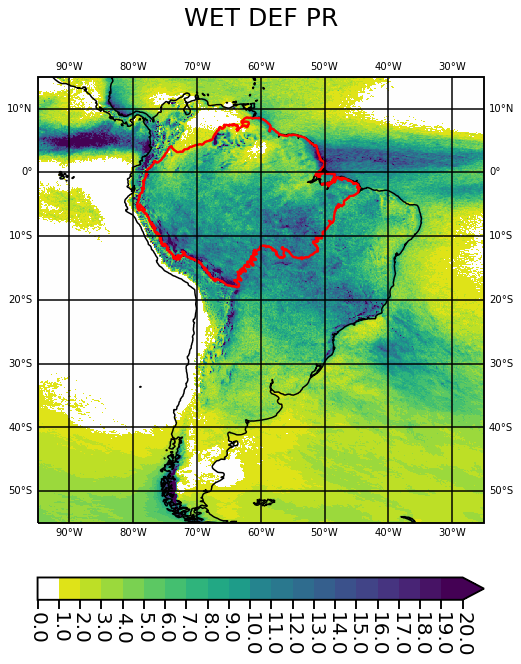

In [48]:
#for i in range(12):
plot_data('WET DEF PR', wet_pr_def100_mean*3600*24, 
             viridis_new, 'max', 0, 20, 21, -60, 20, 10, -100, -20, 20) 

_1D plot: time series_

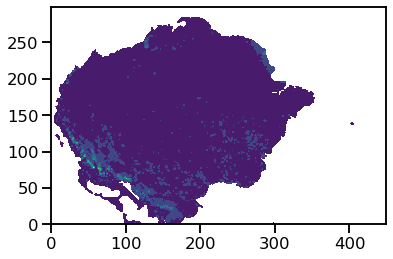

In [21]:
plt.contourf(dset_mask_def100.isel(time=0).sel(lon=slice(-80,-35), lat=slice(-20,10)))

In [32]:
# Averaged Monthly precipitation & land only
ctl_mon_pr = dset_mon_mask_ctl.sel(lon=slice(-80,-35), lat=slice(-20,10)).mean(("lon", "lat"),skipna=True)
def100_mon_pr = dset_mon_mask_def100.sel(lon=slice(-80,-35), lat=slice(-20,10)).mean(("lon", "lat"),skipna=True)

In [14]:
# Monthly precipitation & land only
ctl_pr = dset_mask_ctl.sel(lon=slice(-80,-35), lat=slice(-20,10)).mean(("lon", "lat"),skipna=True)
def100_pr = dset_mask_def100.sel(lon=slice(-80,-35), lat=slice(-20,10)).mean(("lon", "lat"),skipna=True)

In [34]:
ctl_pr_mon_value = ctl_mon_pr*3600*24
def100_pr_mon_value = def100_mon_pr*3600*24

In [15]:
ctl_pr_value = ctl_pr*3600*24
def100_pr_value = def100_pr*3600*24

In [23]:
def to_monthly(ds):
    year = ds.time.dt.year
    month = ds.time.dt.month

    # assign new coords
    ds = ds.assign_coords(year=("time", year.data), month=("time", month.data))

    # reshape the array to (..., "month", "year")
    return ds.set_index(time=("year", "month")).unstack("time")  

In [28]:
ctl_pr_value_yr = to_monthly(ctl_pr_value)
def_pr_value_yr = to_monthly(def100_pr_value)

In [29]:
ctl_pr_value_yr

<xarray.DataArray 'pr' (year: 3, month: 12)>
dask.array<reshape, shape=(3, 12), dtype=float32, chunksize=(1, 12), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 2020 2021 2022
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

_plot_

(0.0, 10.0)

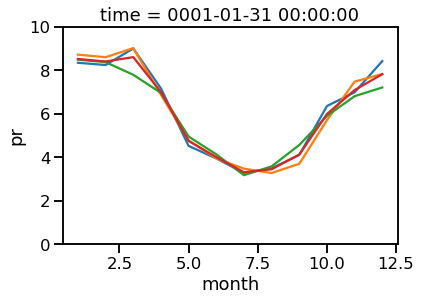

In [35]:
ctl_pr_value_yr.isel(year=0).plot()
ctl_pr_value_yr.isel(year=1).plot()
ctl_pr_value_yr.isel(year=2).plot()
ctl_pr_mon_value.plot()

#def100_pr_value.plot()

plt.ylim(0,10)

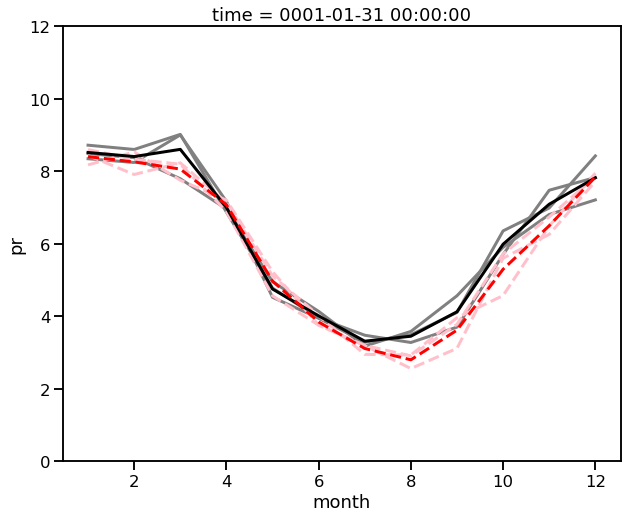

In [39]:
fig = plt.figure(figsize=(10,8))
#ctl_pr.plot.line()
#ctl_pr_mon_value.plot(label='CTL',c='black',linewidth=3)
ctl_pr_value_yr.isel(year=0).plot(c='grey',linewidth=3)
ctl_pr_value_yr.isel(year=1).plot(c='grey',linewidth=3)
ctl_pr_value_yr.isel(year=2).plot(c='grey',linewidth=3)

#def100_pr_mon_value.plot(label='DEF100',c='red',linewidth=3, ls='--')
def_pr_value_yr.isel(year=0).plot(c='pink',linewidth=3, ls='--')
def_pr_value_yr.isel(year=1).plot(c='pink',linewidth=3, ls='--')
def_pr_value_yr.isel(year=2).plot(c='pink',linewidth=3, ls='--')

ctl_pr_mon_value.plot(label='CTL',c='black',linewidth=3)
def100_pr_mon_value.plot(label='DEF100',c='red',linewidth=3, ls='--')
plt.ylim(0,12)
#plt.xlim(-1,13)
#myax.set_ylabel('Precipitation [mm/day]',fontsize=30)
#myax.set_xticks(fontsize=25,rotation=45)
#myax.set_yticks(fontsize=30)
fig.savefig('./mean_land_ctl_def_3rd.png', transparent=True)

In [90]:
year = ctl_pr.time.dt.year
month = ctl_pr.time.dt.month

# assign new coords
ctl_pr_test = ctl_pr.assign_coords(year=("time", year.data), month=("time", month.data))
def100_pr_test = def100_pr.assign_coords(year=("time", year.data), month=("time", month.data))
ctl_pr_test.drop_vars('time')
def100_pr_test.drop_vars('time')

<xarray.DataArray 'pr' (time: 12)>
dask.array<mean_agg-aggregate, shape=(12,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    year     (time) int64 2020 2020 2020 2020 2020 ... 2020 2020 2020 2020 2020
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: time

In [33]:
year = ctl_tas.time.dt.year
month = ctl_tas.time.dt.month

# assign new coords
ctl_tas_test = ctl_tas.assign_coords(year=("time", year.data), month=("time", month.data))
def100_tas_test = def100_tas.assign_coords(year=("time", year.data), month=("time", month.data))
ctl_tas_test.drop_vars('time')
def100_tas_test.drop_vars('time')

<xarray.DataArray 'tas' (time: 12, height_2: 1)>
dask.array<mean_agg-aggregate, shape=(12, 1), dtype=float32, chunksize=(1, 1), chunktype=numpy.ndarray>
Coordinates:
  * height_2  (height_2) float64 2.0
    year      (time) int64 2020 2020 2020 2020 2020 ... 2020 2020 2020 2020 2020
    month     (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: time

In [91]:
b=ctl_pr_test.drop_vars('time')
c=def100_pr_test.drop_vars('time')
b= b.drop_vars('year')
c= c.drop_vars('year')

In [34]:
b=ctl_tas_test.drop_vars('time')
c=def100_tas_test.drop_vars('time')
b= b.drop_vars('year')
c= c.drop_vars('year')

In [35]:
c

<xarray.DataArray 'tas' (time: 12, height_2: 1)>
dask.array<mean_agg-aggregate, shape=(12, 1), dtype=float32, chunksize=(1, 1), chunktype=numpy.ndarray>
Coordinates:
  * height_2  (height_2) float64 2.0
    month     (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: time

In [ ]:
plt.plot(b)

TypeError: set_ticks() missing 1 required positional argument: 'ticks'

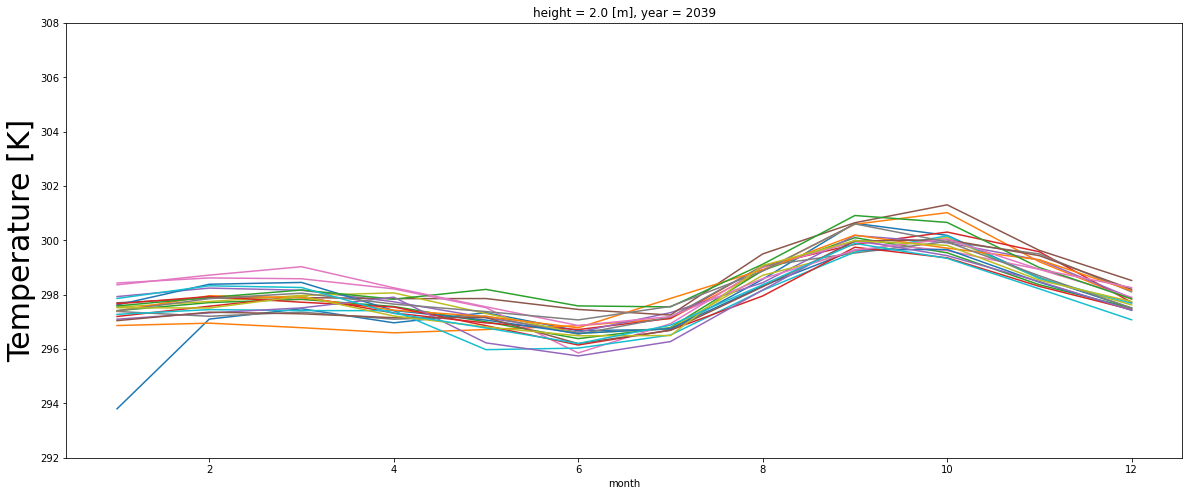

In [42]:
import datetime
fig, myax = plt.subplots(figsize=(20,8))

for i in range(20):
    a.isel(year=i,height=0).plot.line()
    #plt.plot(np.arange(1,13), a.isel(year=i))  
#b.plot.line(label='CTL',c='black',linewidth=3)
#c.plot.line(label='DEF100',ls='--',c='black',linewidth=3)

myax.set_ylim(292,308)
#myax.set_ylabel('Precipitation [mm/day]',fontsize=30)
myax.set_ylabel('Temperature [K]',fontsize=30)

myax.set_xticks(fontsize=25,rotation=45)
myax.set_yticks(fontsize=30)

myax.set_xlabel('Month')
myax.set_xticks(range(1, 13))
myax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])

myax.set_legend(fontsize=25, frameon=False)

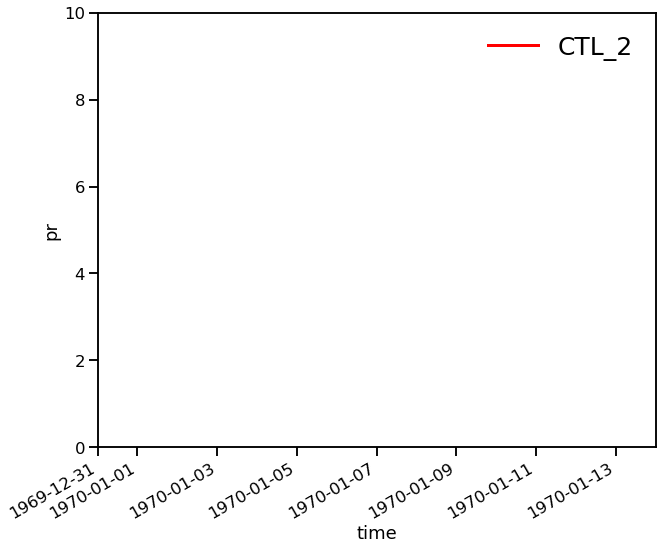

In [30]:
import datetime
fig, myax = plt.subplots(figsize=(10,8))

#for i in range(20):
#    a.isel(year=i).plot.line()
    #plt.plot(np.arange(1,13), a.isel(year=i))  
def100_pr_value.plot.line(label='CTL_2',c='red',linewidth=3)
#c.isel(height_2=0).plot.line(label='DEF100',ls='--',c='black',linewidth=3)

myax.set_ylim(0,10)
myax.set_xlim(-1,13)
#myax.set_ylabel('Precipitation [mm/day]',fontsize=30)
#myax.set_xticks(fontsize=25,rotation=45)
#myax.set_yticks(fontsize=30)

myax.legend(fontsize=25, frameon=False)
#fig.savefig('./tas_1.png', transparent=True)

In [ ]:
import datetime
fig, myax = plt.subplots(figsize=(20,8))

#for i in range(20):
#    a.isel(year=i).plot.line()
    #plt.plot(np.arange(1,13), a.isel(year=i))  
b.isel(height_2=0).plot.line(label='DEF100_2',c='red',linewidth=3, ls='--')
#c.isel(height_2=0).plot.line(label='DEF100',ls='--',c='black',linewidth=3)

myax.set_ylim(292,308)
#myax.set_ylabel('Precipitation [mm/day]',fontsize=30)
#myax.set_xticks(fontsize=25,rotation=45)
#myax.set_yticks(fontsize=30)

myax.legend(fontsize=25, frameon=False)
fig.savefig('./tas_1.png', transparent=True)

In [ ]:
import datetime
def line_plot(data,)
fig = plt.figure(figsize=(10,8))

pr_monavg_amz.sel(year=2020).plot.line(linewidth=2.5)
#def100_spaiavg_amz_mon.plot.line(label="DEF100",c='red',linewidth=2.5)

plt.ylabel('Precipitation [mm/day]',fontsize=30)
#plt.xlabel('Time',fontsize=20)
#plt.axvspan(datetime.date(2020, 1, 20),datetime.date(2020, 9, 1),facecolor='gray',alpha=0.5)
#plt.xlim([datetime.Monthly(2020, 1),datetime.Monthly(2021, 1)])
plt.ylim(0,15)
plt.xticks(fontsize=25,rotation=45)
plt.yticks(fontsize=30)
plt.legend(fontsize=25, frameon=False)

In [ ]:
%time a = pr_monavg_amz['pr'].values

In [32]:
import datetime
fig = plt.figure(figsize=(10,8))

pr_monavg_amz.sel(year=2020).plot.line(linewidth=2.5)
#def100_spaiavg_amz_mon.plot.line(label="DEF100",c='red',linewidth=2.5)

plt.ylabel('Precipitation [mm/day]',fontsize=30)
#plt.xlabel('Time',fontsize=20)
#plt.axvspan(datetime.date(2020, 1, 20),datetime.date(2020, 9, 1),facecolor='gray',alpha=0.5)
#plt.xlim([datetime.Monthly(2020, 1),datetime.Monthly(2021, 1)])
plt.ylim(0,15)
plt.xticks(fontsize=25,rotation=45)
plt.yticks(fontsize=30)
plt.legend(fontsize=25, frameon=False)

AttributeError: '_Dataset_PlotMethods' object has no attribute 'line'

<Figure size 720x576 with 0 Axes>

In [ ]:
pr_monavg_amz.sel(year=2020).plot.line(linewidth=2.5)